In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

clinical_load = "05-Matplotlib_Homework_Instructions_Pymaceuticals_data_clinicaltrial_data.csv"
mouse_load = "05-Matplotlib_Homework_Instructions_Pymaceuticals_data_mouse_drug_data.csv"

clinical_df = pd.read_csv(clinical_load)
mouse_df = pd.read_csv(mouse_load)

In [43]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [44]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [45]:
merged_df = clinical_df.merge(mouse_df, on = 'Mouse ID', how = 'outer')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [46]:
#responce to tumor treatment
tumor_vol = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [47]:
tumor_vol_pivot = merged_df.pivot_table(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [48]:
#plot here

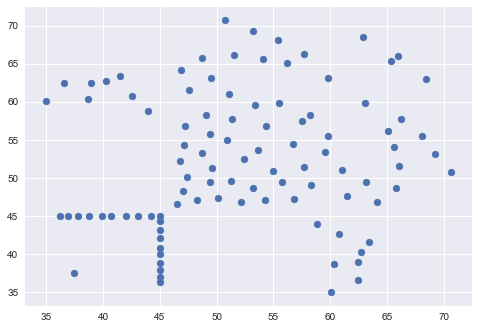

In [53]:
x = tumor_vol_pivot
y = tumor_vol
plt.scatter(x,y, label = 'Tumor Responce to treatment' )

In [24]:
#meta static response to treatments
time_responce = merged_df.groupby(['Drug', 'Timepoint']).mean()[['Metastatic Sites']]
time_responce.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [25]:
time_responce_se = merged_df.groupby(['Drug', 'Timepoint'])[['Metastatic Sites']].sem()
time_responce_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [26]:
#meta_sites = meta_sites.reset_index()
meta_sites = merged_df.pivot_table(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
meta_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


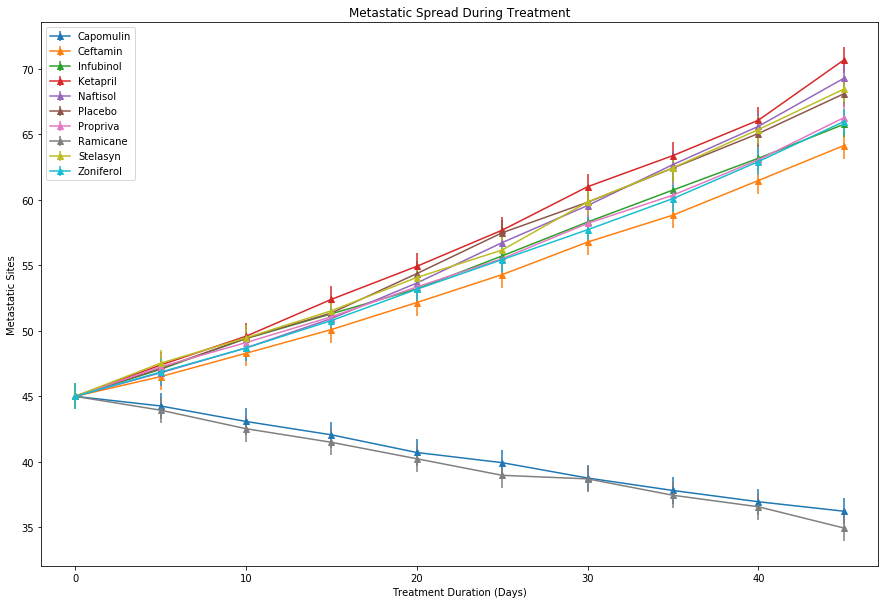

In [27]:
meta_sites.plot(yerr = (1), figsize = (15,10),marker = "^")
plt.xlim(-2,47)
plt.legend(meta_sites.columns,loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.show()

In [28]:
#survival rates
mouse_response = merged_df.groupby(['Drug','Timepoint']).count()[['Mouse ID']]
mouse_response.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [29]:
#mouse_survival = mouse_survival.reset_index()
mouse_survival = pd.pivot_table(mouse_response, index = "Timepoint", columns="Drug", values='Mouse ID')
mouse_survival.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


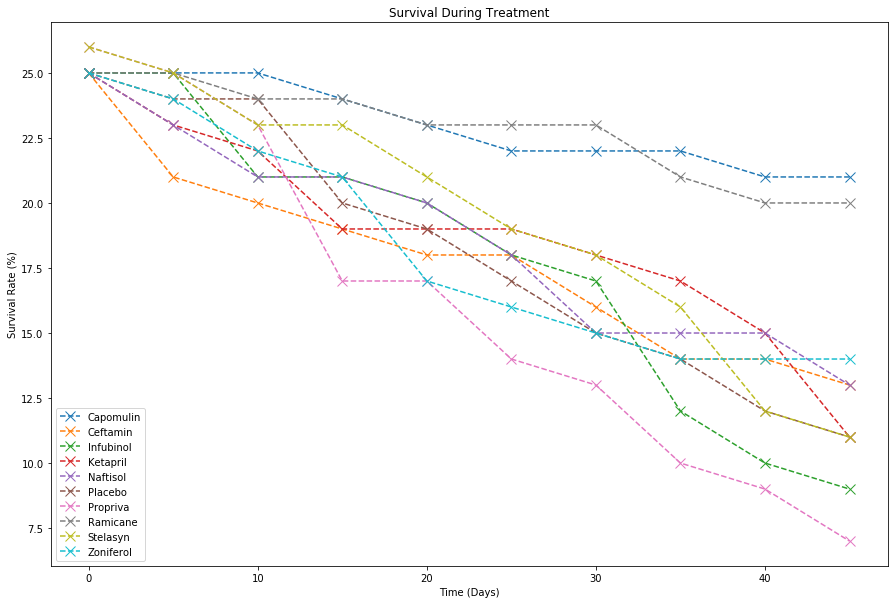

In [30]:
#plot and graph it 
plt.figure(figsize=(15,10))
plt.plot(mouse_survival.index.values,mouse_survival,"x--",markersize=10)
plt.legend(mouse_survival.columns,loc="lower left")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
#plt.savefig('survival_data.png')
plt.show()

In [31]:
#summary bar graph
tumor_percent = (((tumor_vol_pivot.iloc[-1]-tumor_vol_pivot.iloc[0]) /tumor_vol_pivot.iloc[0]) *100).to_frame("% Change")
print(tumor_percent)


            % Change
Drug                
Capomulin -19.475303
Ceftamin   42.516492
Infubinol  46.123472
Ketapril   57.028795
Naftisol   53.923347
Placebo    51.297960
Propriva   47.241175
Ramicane  -22.320900
Stelasyn   52.085134
Zoniferol  46.579751


IndexError: tuple index out of range

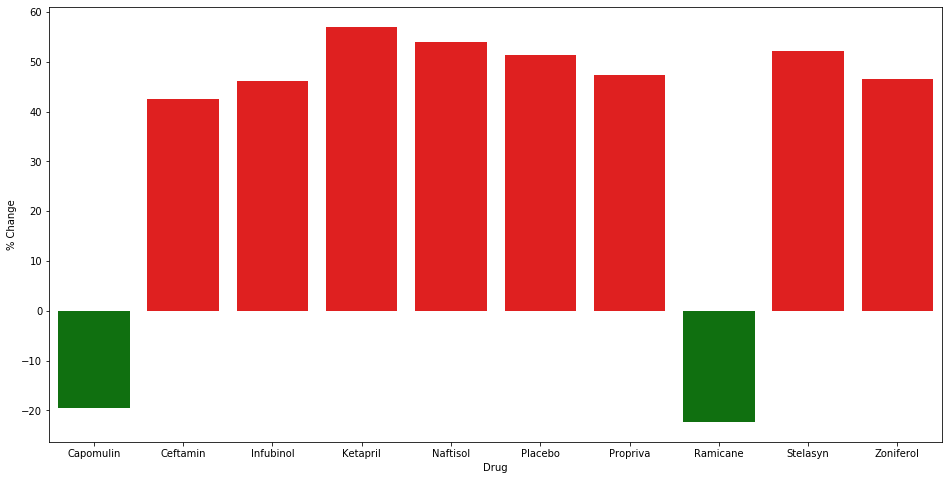

In [35]:
x = tumor_percent.index
y = tumor_percent['% Change']
plt.figure(figsize=(16,8))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()

Observations: 
1. All the durgs survival rates decrease as the days pass by. By 45 days after drug administration capomulin has the highest survival rate with over 22.5% surviving and Zoniferol has the lowest survival rate with less than 7.5% survival. 
2. During treatment only Ramicane and Caponulin have shown noticiable decreases in metastatic sites. 
3. Stelasyn drug has a survival rate of over 25% on day one but at the end of the treatment drops to a little over 12.5% 